In [27]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree
from IPython.display import HTML

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [28]:
# Подготовку данных возьмем из титиника
from sklearn.model_selection import train_test_split
titanic_data = pd.read_csv('data/titanic/train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis='columns')
y = titanic_data.Survived
X = pd.get_dummies(X)  # Метод который самостоятельно переведет строковые значения в числовые
X = X.fillna({'Age': X.Age.median()})
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
rf = RandomForestClassifier(n_estimators= 15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

## Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

In [30]:
df = pd.read_csv('data/heart.csv')
X = df.drop('target', axis='columns')
y = df.target
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [32]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
np.random.seed(0)
clf_rf = RandomForestClassifier(10, max_depth=5)
params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}
from sklearn.model_selection import GridSearchCV

# Grid-Сетка, Search-Поиск, CV-Cross Validation- Перекрестная Проверка.
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5)
grid_search_cv_clf.fit(x_train, y_train)
# grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_

<AxesSubplot:>

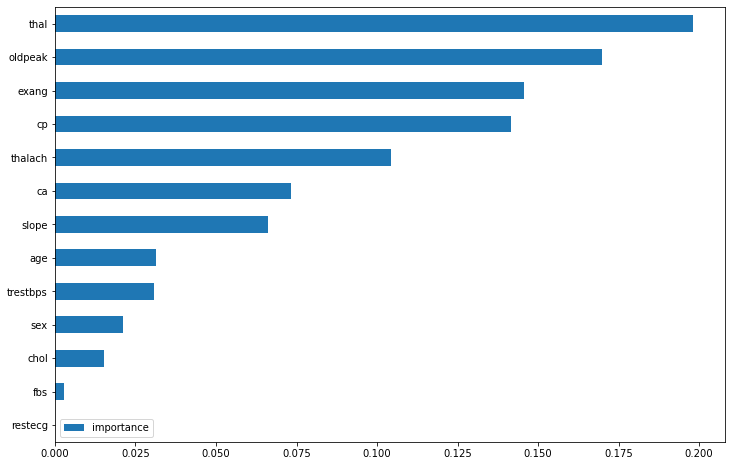

In [33]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))